In [ ]:
pip install bing-hashing-image-downloader


In [ ]:
mkdir images

In [ ]:
from bing_hashing_image_downloader import downloader
downloader.download("mighty morphin red ranger", limit=200, output_dir='images')

In [ ]:
from bing_hashing_image_downloader import downloader
downloader.download("mighty morphin blue ranger", limit=200, output_dir='images')

In [ ]:
from bing_hashing_image_downloader import downloader
downloader.download("mighty morphin yellow ranger", limit=200, output_dir='images')

In [ ]:
from bing_hashing_image_downloader import downloader
downloader.download("mighty morphin pink ranger", limit=200, output_dir='images')

In [ ]:
from bing_hashing_image_downloader import downloader
downloader.download("mighty morphin black ranger", limit=200, output_dir='images')

In [ ]:
from bing_hashing_image_downloader import downloader
downloader.download("mighty morphin green ranger", limit=200, output_dir='images')

In [ ]:
from bing_hashing_image_downloader import downloader
downloader.download("mighty morphin white ranger", limit=200, output_dir='images')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib
image_dataset = "/content/images"
data_dir = pathlib.Path(image_dataset)
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)


1019


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1019 files belonging to 7 classes.
Using 816 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1019 files belonging to 7 classes.
Using 203 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['mighty morphin black ranger', 'mighty morphin blue ranger', 'mighty morphin green ranger', 'mighty morphin pink ranger', 'mighty morphin red ranger', 'mighty morphin white ranger', 'mighty morphin yellow ranger']


In [ ]:
from pathlib import Path
import imghdr

data_dir = "/content/images"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

/content/images/mighty morphin yellow ranger/e21fe560d779b748dbe9fc36e1ca8e045ea66426.png is a webp, not accepted by TensorFlow


In [ ]:
from PIL import Image
im = Image.open("/content/images/mighty morphin yellow ranger/e21fe560d779b748dbe9fc36e1ca8e045ea66426.png").convert("RGB")
im.save("/content/images/mighty morphin yellow ranger/e21fe560d779b748dbe9fc36e1ca8e045ea66426.png", "png")

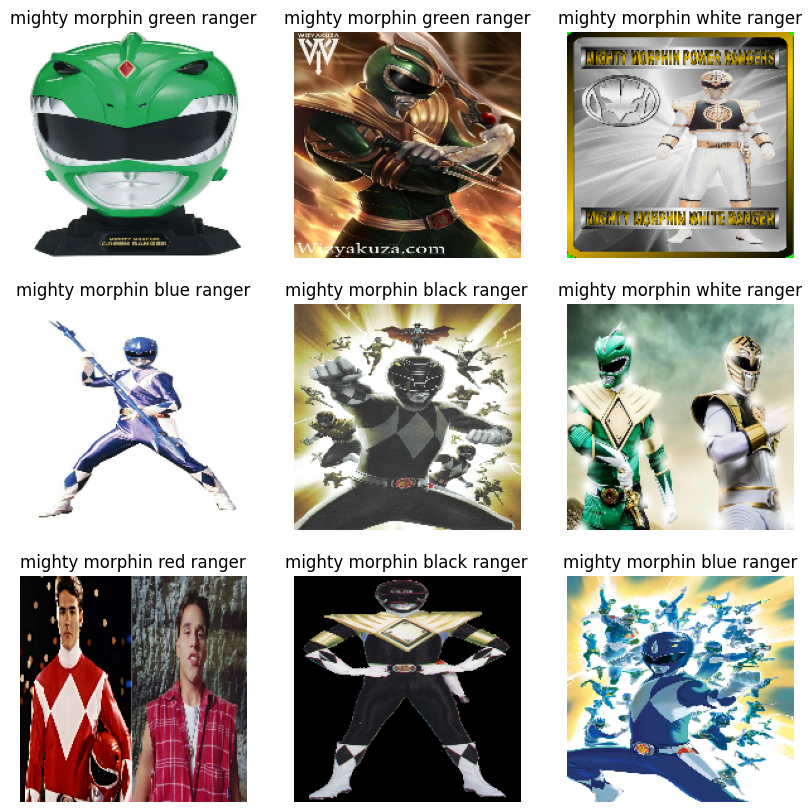

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.Rescaling(1./255)

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name='Adam'
)

In [ ]:
tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False,
    ignore_class=None,
    reduction='auto',
    name='sparse_categorical_crossentropy'
)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
26/26 [==============================] - 26s 923ms/step - loss: 0.4219 - accuracy: 0.8811 - val_loss: 0.7878 - val_accuracy: 0.7882
Epoch 2/20
26/26 [==============================] - 24s 832ms/step - loss: 0.2886 - accuracy: 0.9167 - val_loss: 0.8228 - val_accuracy: 0.7586
Epoch 3/20
26/26 [==============================] - 25s 882ms/step - loss: 0.1735 - accuracy: 0.9559 - val_loss: 0.7414 - val_accuracy: 0.8079
Epoch 4/20
26/26 [==============================] - 26s 901ms/step - loss: 0.0973 - accuracy: 0.9743 - val_loss: 0.8026 - val_accuracy: 0.8177
Epoch 5/20
26/26 [==============================] - 24s 877ms/step - loss: 0.0715 - accuracy: 0.9841 - val_loss: 0.6905 - val_accuracy: 0.7980
Epoch 6/20
26/26 [==============================] - 24s 839ms/step - loss: 0.0500 - accuracy: 0.9890 - val_loss: 0.9203 - val_accuracy: 0.8128
Epoch 7/20
26/26 [==============================] - 25s 879ms/step - loss: 0.0444 - accuracy: 0.9890 - val_loss: 0.8668 - val_accuracy: 0.8079

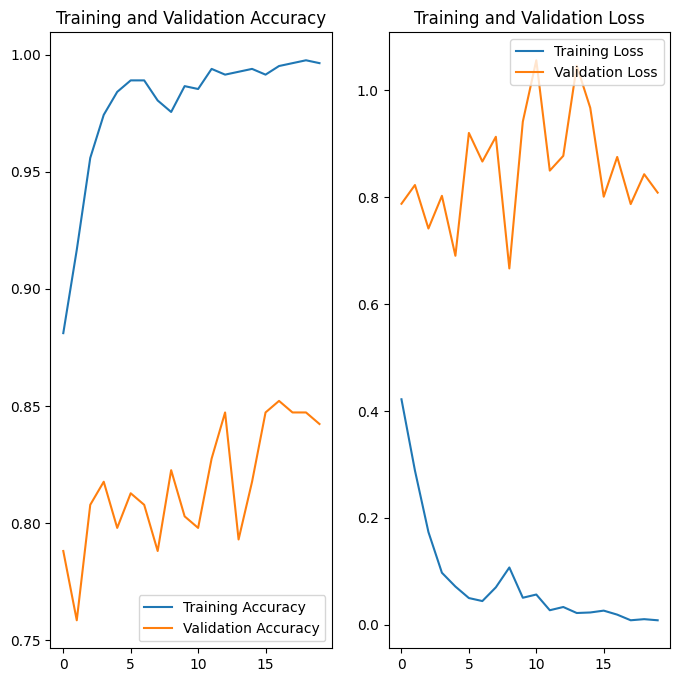

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

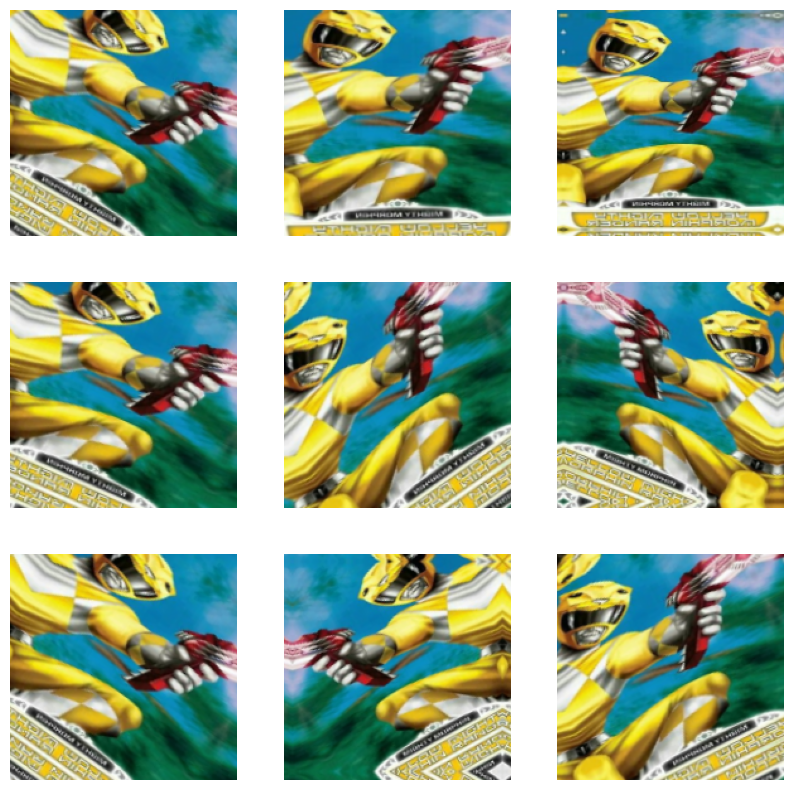

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [ ]:
layer = tf.keras.layers.Dropout(.2, input_shape=(2,))
data = np.arange(10).reshape(5, 2).astype(np.float32)
print(data)
outputs = layer(data, training=True)
print(outputs)

[[0. 1.]
 [2. 3.]
 [4. 5.]
 [6. 7.]
 [8. 9.]]
tf.Tensor(
[[ 0.    0.  ]
 [ 2.5   3.75]
 [ 0.    6.25]
 [ 7.5   8.75]
 [10.    0.  ]], shape=(5, 2), dtype=float32)


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
26/26 [==============================] - 35s 1s/step - loss: 1.6630 - accuracy: 0.3946 - val_loss: 1.3822 - val_accuracy: 0.5172
Epoch 2/20
26/26 [==============================] - 38s 1s/step - loss: 0.9865 - accuracy: 0.6728 - val_loss: 0.8027 - val_accuracy: 0.7537
Epoch 3/20
26/26 [==============================] - 33s 1s/step - loss: 0.7260 - accuracy: 0.7966 - val_loss: 0.6687 - val_accuracy: 0.8030
Epoch 4/20
26/26 [==============================] - 35s 1s/step - loss: 0.5973 - accuracy: 0.8260 - val_loss: 0.7248 - val_accuracy: 0.7833
Epoch 5/20
26/26 [==============================] - 39s 1s/step - loss: 0.5734 - accuracy: 0.8150 - val_loss: 0.6408 - val_accuracy: 0.8227
Epoch 6/20
26/26 [==============================] - 36s 1s/step - loss: 0.5366 - accuracy: 0.8505 - val_loss: 0.5737 - val_accuracy: 0.8276
Epoch 7/20
26/26 [==============================] - 36s 1s/step - loss: 0.4165 - accuracy: 0.8848 - val_loss: 0.5096 - val_accuracy: 0.8424
Epoch 8/20
26/26 [==

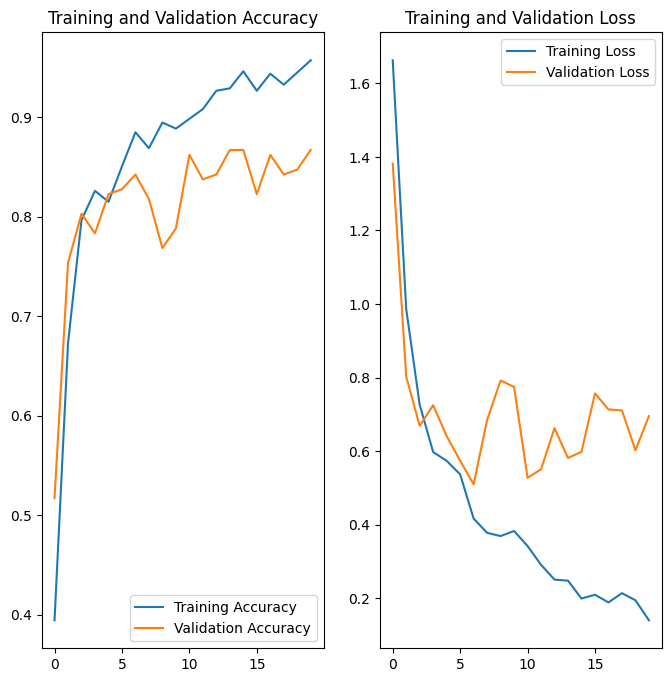

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
powerranger_url1 = "https://cincinnati.partyprincessproductions.com/wp-content/uploads/sites/16/2019/11/power-ranger-1.jpg"
powerranger_path1 = tf.keras.utils.get_file('power-ranger-1', origin=powerranger_url1 )
img = tf.keras.utils.load_img(
    powerranger_path1, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 26ms/step
This image most likely belongs to mighty morphin red ranger with a 99.19 percent confidence.


In [ ]:
powerranger_url2 = "https://cdn.ezcosplay.com/media/catalog/product/2/6/2608079_1620094457_1.jpg"
powerranger_path2 = tf.keras.utils.get_file('2608079_1620094457_1', origin=powerranger_url2 )
img = tf.keras.utils.load_img(
    powerranger_path2, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 27ms/step
This image most likely belongs to mighty morphin yellow ranger with a 96.37 percent confidence.


In [ ]:
powerranger_url3 = "https://assets-prd.ignimgs.com/2022/11/20/jason-david-frank-power-rangersjpg-f552d9-1668966852195.jpg"
powerranger_path3 = tf.keras.utils.get_file('jason-david-frank-power-rangersjpg-f552d9-1668966852195', origin=powerranger_url3 )
img = tf.keras.utils.load_img(
    powerranger_path3, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 29ms/step
This image most likely belongs to mighty morphin green ranger with a 98.21 percent confidence.
